In [259]:
import numpy as np
import statistics
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import minimize

In [260]:
#Read the data
data_dict = scipy.io.loadmat('/Users/mengxiangyu/Downloads/Machine Learning Andrew Ng/machine-learning-ex5/ex5/ex5data1.mat')
X=data_dict['X']
Y=data_dict['y']

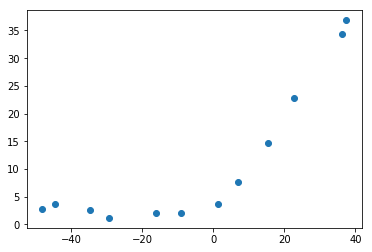

In [261]:
plt.scatter(X,Y)

In [262]:

yval = data_dict['yval']
Xval = np.c_[np.ones_like(data_dict['Xval']), data_dict['Xval']]


In [270]:
#Cost function for linear ridge regression
def linear_rigde_cost(theta, X, y, reg):
    
    m = y.size
    X_new= np.c_[np.ones_like(X), X]
    h = X_new.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
   
    return(J)

In [271]:
#Gradient function for linear ridge regression

def linear_rigde_grad(theta, X, y, reg):
    m = y.size
    
    X_new= np.c_[np.ones_like(X), X]
    h = X_new.dot(theta.reshape(-1,1))
    grad = (1/m)*(X_new.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    
    return(grad.flatten())

In [272]:
#Set inital theta for the optimization
initial_theta = np.array([[10],[10]])
res = minimize(linear_rigde_cost, initial_theta, args=(X, y_train, 0.1), method=None, jac=linear_rigde_grad,
                   options={'maxiter':5000})

In [273]:
res

      fun: 1602.425910402669
 hess_inv: array([[0.99997264, 0.00597793],
       [0.00597793, 0.00121371]])
      jac: array([-0.08949128, -0.0005688 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 89
      nit: 2
     njev: 77
   status: 2
  success: False
        x: array([12.99557783,  0.36722187])

/Users/mengxiangyu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/mengxiangyu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


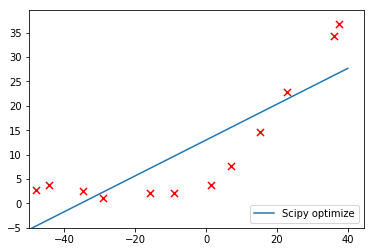

In [268]:
fit = res
plt.plot(np.linspace(-50,40), (fit.x[0]+ (fit.x[1]*np.linspace(-50,40))), label='Scipy optimize')
#plt.plot(np.linspace(-50,40), (regr.coef_[0]+ (regr.coef_[1]*np.linspace(-50,40))), label='Scikit-learn')
plt.scatter(X, Y, s=50, c='r', marker='x', linewidths=1)

plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc=4);

In [324]:
#Polynomial ridge regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly.fit_transform(X).shape

(12, 4)

In [325]:
X4=poly.fit_transform(X)

In [326]:
#Polynomial ridge regression cost function
def linear_rigde_cost_poly(theta, X, y, reg):
    
    m = y.size
    
    h = X.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
   
    return(J)
#Polynomial ridge regression gradient function
def linear_rigde_grad_poly(theta, X, y, reg):
    m = y.size

    h = X.dot(theta.reshape(-1,1))
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    
    return(grad.flatten())

In [327]:
theta_poly = np.ones((X4.shape[1],1))*10

In [328]:
linear_rigde_cost_poly(theta_poly,X4,Y,1)

111870316608.4686

In [329]:
linear_rigde_grad_poly(theta_poly,X4,Y,1)

array([-1.19853197e+05,  1.27766821e+07, -2.85548538e+08,  2.26472251e+10])

In [330]:
res_poly = minimize(linear_rigde_cost_poly, theta_poly, args=(X4, Y, 5), method=None, jac=linear_rigde_grad_poly,
                   options={'maxiter':5000})

In [331]:
res_poly

      fun: 1719.3203456803542
 hess_inv: array([[ 9.99935095e-01,  8.01617734e-03, -7.91482654e-04,
        -9.21263270e-06],
       [ 8.01617734e-03,  9.43169086e-03, -4.73535402e-05,
        -5.87433147e-06],
       [-7.91482654e-04, -4.73535402e-05,  1.91511704e-06,
         4.71131838e-08],
       [-9.21263270e-06, -5.87433147e-06,  4.71131838e-08,
         4.30094770e-09]])
      jac: array([ 5.16309119e-01, -3.18303129e+01,  3.44405581e+02, -2.72982553e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 114
      nit: 7
     njev: 102
   status: 2
  success: False
        x: array([5.90677697e+00, 2.44420669e-01, 1.03022318e-02, 1.30603110e-04])

In [332]:
# plot range for x
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = poly.fit_transform(plot_x.reshape(-1,1)).dot(res_poly.x)


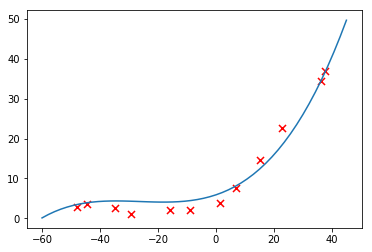

In [333]:
plt.plot(np.linspace(-60,45), plot_y, label='Scipy optimize')
plt.scatter(X, Y, s=50, c='r', marker='x', linewidths=1)
